In [8]:
import matplotlib.pyplot as plt
from nltk import word_tokenize, FreqDist
import pandas as pd
from gensim.models import Word2Vec


In [44]:
df = pd.read_csv(r"D:\Proyectos\nllp_antitrust.v1\corpus_rol.csv")
df

,case_name,rule_of_law,rol_preprocessed
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,sherman act prohibition agreement restraint tr...
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,combination sole purpose regulate price violat...
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,violation sherman act determined potential har...
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,direct purchaser engaged unlawful manufacturin...
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,consumer retail good service standing sue dama...
...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,rent control ordinance conflict federal antitr...
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,state policy immune antitrust regulation clear...
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,municipality anticompetitive activity protecte...
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...",city may regulation give business concern de f...


***1. Word Embeddings***

Here we will do a specific tokenization. In the following models, we will use another approach

In [5]:
# We will tokenize each cell in "rol_preprocessed"

sentences = [word_tokenize(doc) for doc in df["rol_preprocessed"]]

In [14]:
type(sentences)

list

In [6]:
print(sentences[:5])

[['sherman', 'act', 'prohibition', 'agreement', 'restraint', 'trade', 'limited', 'unreasonable', 'restraint'], ['combination', 'sole', 'purpose', 'regulate', 'price', 'violative', 'public', 'policy', 'sherman', 'act'], ['violation', 'sherman', 'act', 'determined', 'potential', 'harm', 'would', 'ensue', 'conspiracy', 'successful', 'actual', 'occurrence'], ['direct', 'purchaser', 'engaged', 'unlawful', 'manufacturing', 'level', 'may', 'seek', 'damage', 'antitrust', 'violation'], ['consumer', 'retail', 'good', 'service', 'standing', 'sue', 'damage', 'clayton', 'act']]


In [9]:
n_dim = 8
model = Word2Vec(sentences, vector_size=n_dim, window=5, min_count=1, sg=1) # Documentar mejor y explicar

In [10]:
model.wv.most_similar("sherman")

[('using', 0.9195469617843628),
 ('item', 0.8805657029151917),
 ('merely', 0.8490035533905029),
 ('agreement', 0.8327290415763855),
 ('compete', 0.8264014720916748),
 ('expert', 0.7800807356834412),
 ('proscribed', 0.7677909731864929),
 ('barrier', 0.7500004172325134),
 ('sold', 0.7346517443656921),
 ('law', 0.7316508293151855)]

***2. Clustering***

This section is based on the repository nlp_lss_2022 by Elliot Ash

In [45]:
# We will read our document term matrix

X = pd.read_pickle(r'D:\Proyectos\nllp_antitrust.v1\X.pkl').toarray()


1. K-means clustering

In [46]:
from sklearn.cluster import KMeans
num_clusters = 20
km = KMeans(n_clusters=num_clusters)
km.fit(X)
doc_clusters = km.labels_.tolist()

In [47]:
df['cluster'] = doc_clusters
df[df['cluster']==3]['rol_preprocessed']

61    determining whether power exists control price...
Name: rol_preprocessed, dtype: object

In [48]:
df

,case_name,rule_of_law,rol_preprocessed,cluster
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,sherman act prohibition agreement restraint tr...,13
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,combination sole purpose regulate price violat...,5
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,violation sherman act determined potential har...,5
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,direct purchaser engaged unlawful manufacturin...,19
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,consumer retail good service standing sue dama...,9
...,...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,rent control ordinance conflict federal antitr...,6
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,state policy immune antitrust regulation clear...,6
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,municipality anticompetitive activity protecte...,6
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...",city may regulation give business concern de f...,12


**2. Silhoutte Score**

In [49]:
from sklearn.metrics import silhouette_score
silhouette_score(X, km.labels_)

0.1714587786707498

In [50]:
sil_scores = []
for n in range(2, num_clusters):
    km = KMeans(n_clusters=n)
    km.fit(X)
    sil_scores.append(silhouette_score(X, km.labels_))

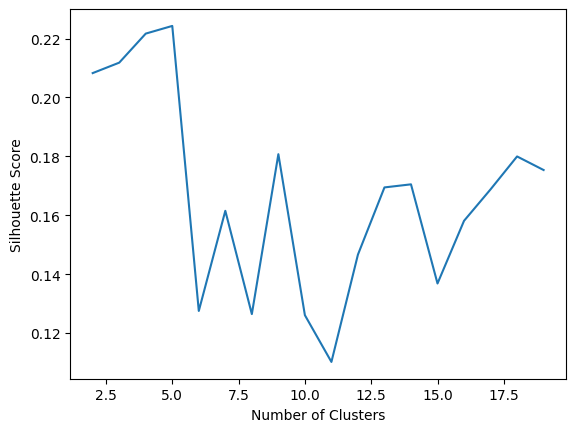

In [51]:
import matplotlib.pyplot as plt 
plt.plot(range(2, num_clusters), sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [52]:
opt_sil_score = max(sil_scores[5:20])
sil_scores.index(opt_sil_score)
opt_num_cluster = range(2, num_clusters)[sil_scores.index(opt_sil_score)]
print('The optimal number of clusters is %s' %opt_num_cluster)

The optimal number of clusters is 9


In [53]:
km = KMeans(n_clusters=opt_num_cluster)
km.fit(X)
doc_clusters = km.labels_.tolist()

df['cluster_mean'] = doc_clusters
df[df['cluster_mean']==1]['rol_preprocessed']

4      consumer retail good service standing sue dama...
11     district court empowered clayton act order com...
12     restriction merely regulate conduct imposing m...
18     purpose antitrust criminal prosecution intent ...
24     federal trade commission jurisdiction nonprofi...
27     conspiracy established merely group competitor...
29     use delivered pricing system throughout indust...
32     survive defense motion summary judgment plaint...
44     long monopoly present manufacturer free impose...
46     state cause action plaintiff distributor must ...
47        nonprice vertical restraint judged rule reason
53     product integrated combine functionality two s...
57     right dissolve company shall reserved time com...
64     even company monopolist right redesign product...
66     patent copyright lawfully acquired patent copy...
67     establish competitive injury due rival low pri...
68     prevail claim plaintiff must show alleged pred...
83     suit preliminary injunct

3. K-Medoids

In [54]:
from sklearn_extra.cluster import KMedoids

kmed = KMedoids(n_clusters=opt_num_cluster)
kmed.fit(X)
doc_clusters = kmed.labels_.tolist()

df['cluster_med'] = doc_clusters
df[df['cluster_med']==1]['rol_preprocessed']

d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 5 is empty! self.labels_[self.medoid_indices_[5]] may not be labeled with its corresponding cluster (5).
  warnings.warn(
d:\Programas\anaconda3\envs\nllp_antitrust_v.1\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 6 is empty! self.labels_[self.medoid_indices_[6]] may not be labeled with its corresponding cluster (6).
  warnings.warn(
d:\P

3      direct purchaser engaged unlawful manufacturin...
8      indirect highly speculative damage may even ca...
26     unlawful conspiracy restraint trade may inferr...
30     business conduct oligopolistic industry may la...
34     covenant compete may legal ancillary productiv...
48     buyer seller state relevant market may still f...
56     full system sale unit may reasonable legitimat...
59     market control industry dominance solely due e...
62     distinctive type service within larger market ...
63     firm even monopolist may keep innovation secre...
76     stock acquisition tendency foreclose substanti...
80     effect merger may substantially lessen competi...
82     prima facie case based statistical showing mar...
85     merger must preliminarily enjoined federal tra...
90     quantity discount may justified actual saving ...
91     manufacturer may held liable price discriminat...
95     discount based cost saving may passed arbitrar...
97     meeting competition defe

***Topic Modeling with LDA***

In [15]:
# clean document
from gensim.utils import simple_preprocess
import spacy
from spacy.tokenizer import Tokenizer
from tqdm import tqdm as tq
nlp = spacy.load('en_core_web_sm')
# this is faster and we don't need the whole grammatical parse analysis

def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit and len(w) > 2]


In [107]:
df["rol_processed"] = df.rule_of_law.apply(lambda x: tokenize(x, nlp))

In [108]:
df

,case_name,rule_of_law,rol_processed
0,United States v. Trans-Missouri Freight Assn. ...,The Sherman Act’s prohibition on agreements in...,"[sherman, act, prohibition, agreement, restrai..."
1,United States v. Addyston Pipe & Steel Co. Fed...,A combination with the sole purpose to regulat...,"[combination, sole, purpose, regulate, price, ..."
2,"Summit Health, Ltd. v. Pinhas Health care oper...",Violation of the Sherman Act is determined by ...,"[violation, sherman, act, determine, potential..."
3,Illinois Brick Co. v. Illinois Manufacturer (D...,Only direct purchasers from those engaged in u...,"[direct, purchaser, engage, unlawful, price, f..."
4,Reiter v. Sonotone Corp. Consumer (P) v. Manuf...,A consumer of retail goods and services has st...,"[consumer, retail, good, service, stand, sue, ..."
...,...,...,...
104,Fisher v. City of Berkeley Landlord (P) v. Cit...,Rent control ordinances do not conflict with f...,"[rent, control, ordinance, conflict, federal, ..."
105,California Retail Liquor Dealers Assn. v. Midc...,A state policy is immune from antitrust regula...,"[state, policy, immune, antitrust, regulation,..."
106,Hallie v. City of Eau Claire Unincorporated to...,A municipality’s anticompetitive activities ar...,"[municipality, anticompetitive, activity, prot..."
107,City of Columbia & Columbia Outdoor Advertisin...,"A city may, through regulation, give a busines...","[city, regulation, business, concern, facto, m..."


In [131]:
# randomize document order
from random import shuffle
shuffle(df['rol_preprocessed'])

# creating the term dictionary
from gensim import corpora
dictionary = corpora.Dictionary(df['rol_preprocessed'])
# filter extremes, drop all words appearing in less than 10 paragraphs and all words appearing in at least every third paragraph
# dictionary.filter_extremes(no_below=10, no_above=0.33, keep_n=1000)
print (len(dictionary))

# creating the document-term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df['rol_preprocessed']]

# train LDA with 10 topics and print
from gensim.models.ldamodel import LdaModel
lda = LdaModel(doc_term_matrix, num_topics=10, 
               id2word = dictionary, passes=3)
lda.show_topics(formatted=True)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

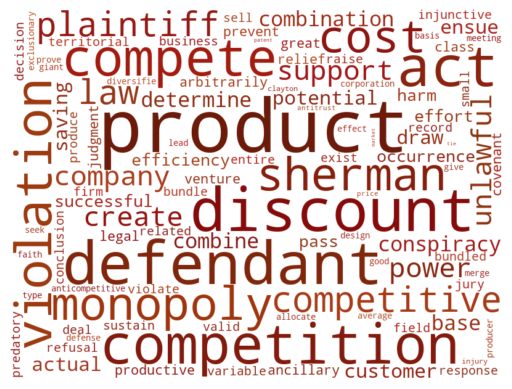

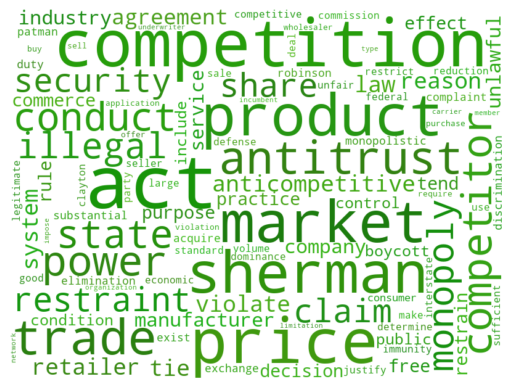

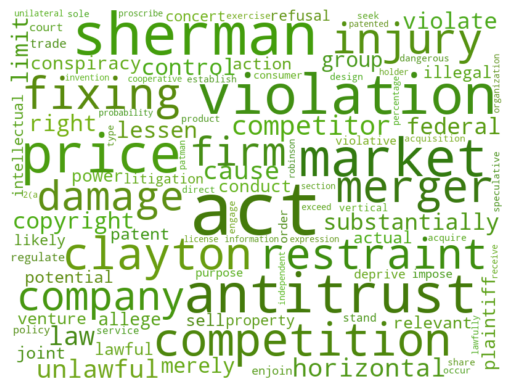

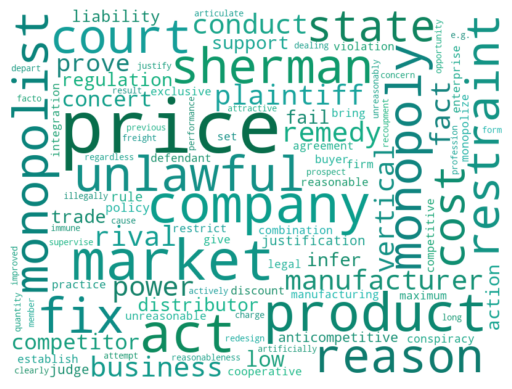

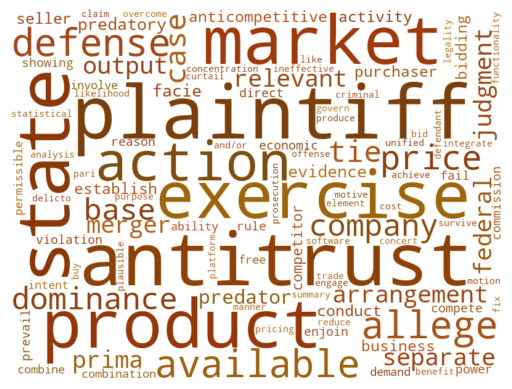

In [114]:
###
# LDA Word Clouds
###

from numpy.random import randint
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# make directory if not exists
from os import mkdir
try:
    mkdir('lda')
except:
    pass

# make word clouds for the topics
for i,weights in lda.show_topics(num_topics=-1,
                                 num_words=100,
                                 formatted=False):
    
    #logweights = [w[0], np.log(w[1]) for w in weights]
    maincol = randint(0,360)
    def colorfunc(word=None, font_size=None, 
                  position=None, orientation=None, 
                  font_path=None, random_state=None):   
        color = randint(maincol-10, maincol+10)
        if color < 0:
            color = 360 + color
        return "hsl(%d, %d%%, %d%%)" % (color,randint(65, 75)+font_size / 7, randint(35, 45)-font_size / 10)   

    
    wordcloud = WordCloud(background_color="white", 
                          ranks_only=False, 
                          max_font_size=120,
                          color_func=colorfunc,
                          height=600,width=800).generate_from_frequencies(dict(weights))

    plt.clf()
    plt.imshow(wordcloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [24]:
observacion = df['rule_of_law'].iloc[16]    
observacion  

'Merely alleging that information dissemination has the potential to cause price regulation does not establish a Sherman Act violation. '